### Zadania

Lista składa się z dwóch sekcji: pierwsza (zadania 1 i 2) dotyczy metod detekcji krawędzi, druga (zadania 3 i 4) operacji na histogramach.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

##### Zad. 1: Wyznaczenie gradientów

Wykonaj dla obrazu `coins` sztuczny obraz ilustrujący wielkość (moduł) wektora gradientu w danym punkcie. Do wyświetlenia użyj [mapy kolorów](https://matplotlib.org/stable/tutorials/colors/colormaps.html) `hot` do oznaczenia wielkości gradientu odpowiednim kolorem – im większa wartość, tym bardziej czerwony (_mapa ciepła_).  
Gdzie gradienty są bliskie zera?  
Czy uzyskany wynik pozwoliłby np. na detekcję obiektów?

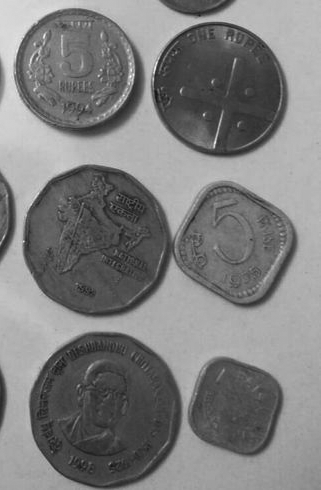

In [2]:
coins = cv2.imread("../Monety_szare.bmp", cv2.IMREAD_GRAYSCALE)
Image.fromarray(coins)

Rozwiązanie:

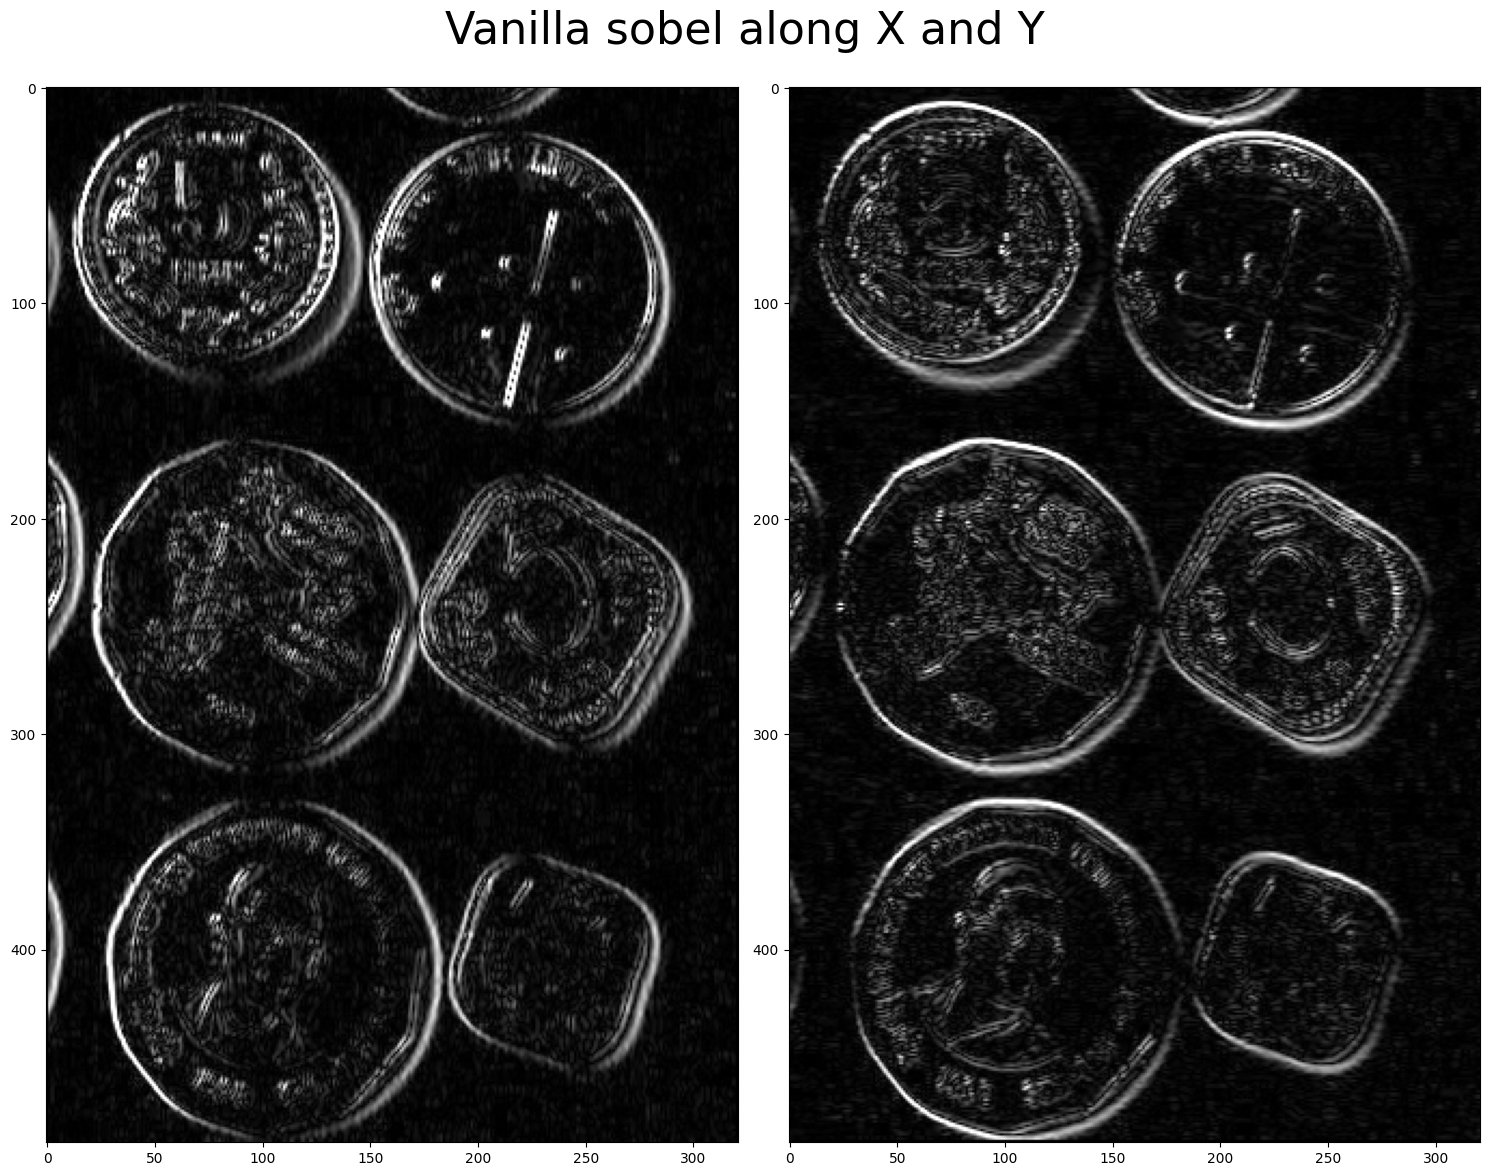

In [3]:
# plt.imshow(coins, cmap="hot")  # przykład wyświetlania z mapą kolorów

# w kierunku X:
sobelx = cv2.Sobel(src=coins, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)

# w kierunku Y:
sobely = cv2.Sobel(src=coins, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)

f, (imx, imy) = plt.subplots(1, 2, figsize=(15, 12))
f.suptitle("Vanilla sobel along X and Y", fontsize=32)
imx.imshow(cv2.convertScaleAbs(sobelx), cmap="gray")
imy.imshow(cv2.convertScaleAbs(sobely), cmap="gray")
f.tight_layout()
plt.show()

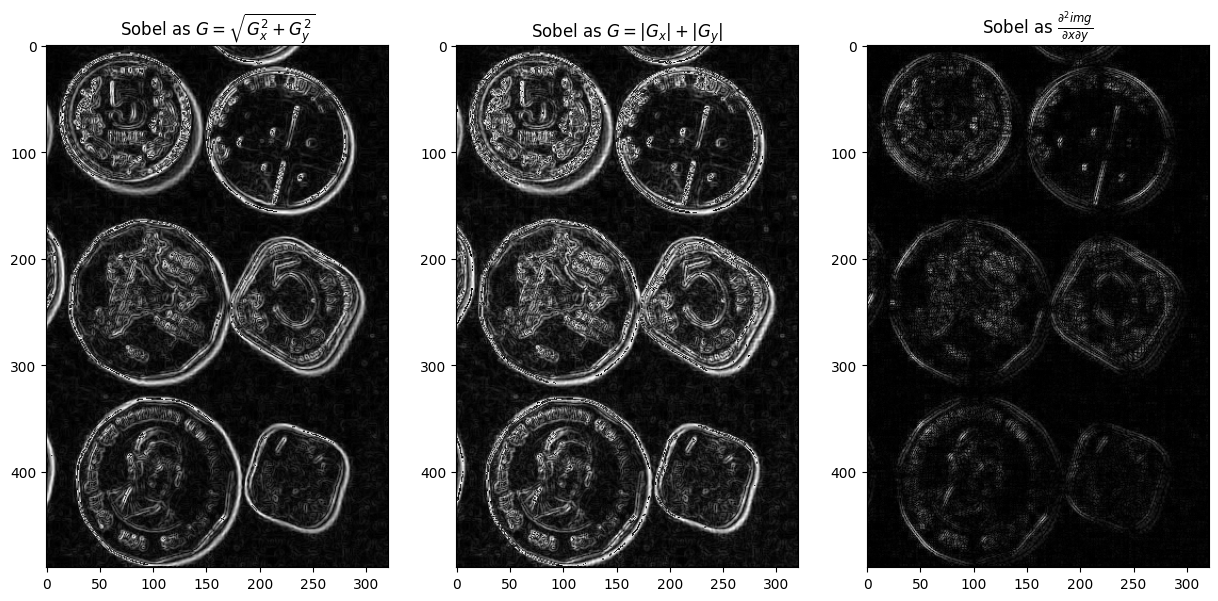

In [4]:
sobel_magnitude = np.sqrt(sobelx**2 + sobely**2)
sobel_magnitude = np.uint8(sobel_magnitude)

simple_sobel_magnitude = np.abs(sobelx) + np.abs(sobely)
simple_sobel_magnitude = np.uint8(simple_sobel_magnitude)

# wylicza pochodną mieszaną ð^2 img / ðxðy
sobel_mixed_derivative = cv2.Sobel(src=coins, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=3)
sobel_mixed_derivative = cv2.convertScaleAbs(sobel_mixed_derivative)

f, (im1, im2, im3) = plt.subplots(1, 3, figsize=(15, 15))
im1.imshow(sobel_magnitude, cmap="gray")
im1.set_title("Sobel as $G = \sqrt{G_x^2 + G_y^2}$")
im2.imshow(simple_sobel_magnitude, cmap="gray")
im2.set_title("Sobel as $G = |G_x| + |G_y|$")
im3.imshow((sobel_mixed_derivative), cmap="gray")
im3.set_title("Sobel as $ \\frac{\partial ^2 img}{\partial x \partial y}$")
plt.show()

---

##### Zad. 2: Detekcja krawędzi

Przeprowadź z obrazem `coins_noise` takie przekształcenia, aby zmaksymalizować możliwość rozpoznania obiektów. Wykorzystaj [filtr Canny'ego](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de) do detekcji krawędzi; zbadaj jego zachowanie w zależności od wartości progów oraz sposobu redukcji szumu.

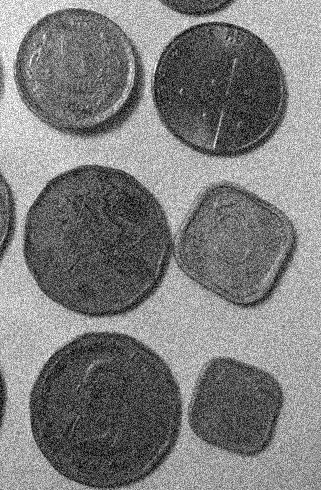

In [5]:
coins_noise = cv2.imread("../Monety_szare_szum.bmp", cv2.IMREAD_GRAYSCALE)
Image.fromarray(coins_noise)

Rozwiązanie:

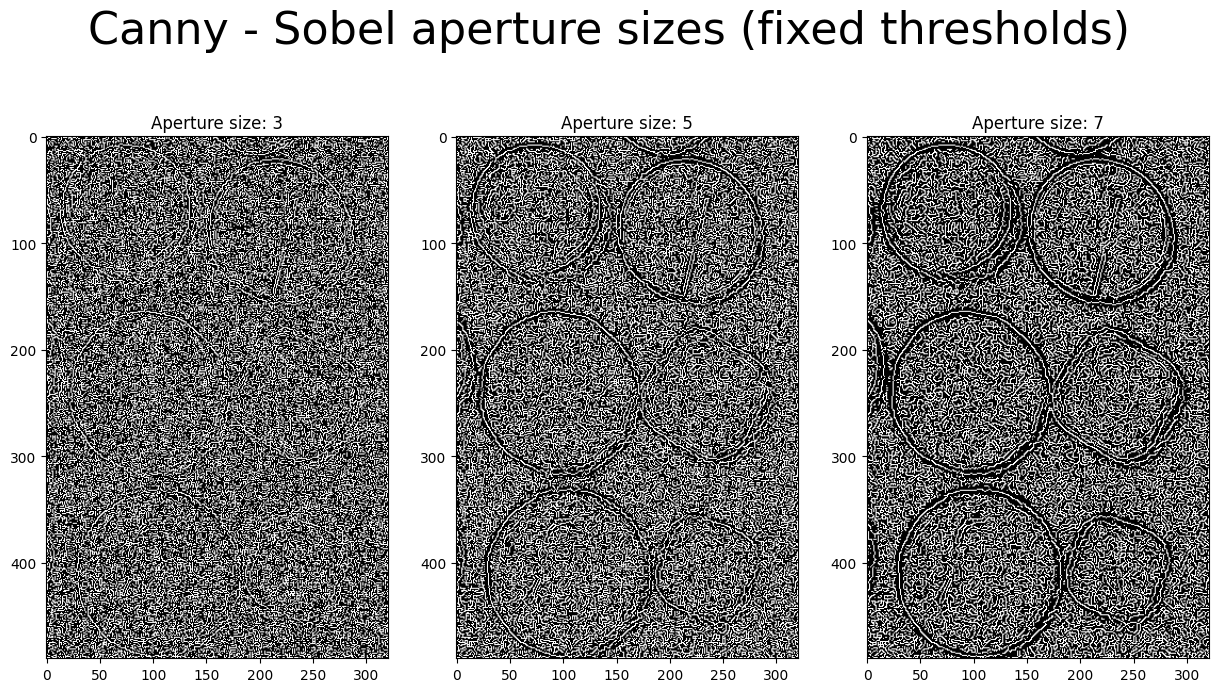

In [6]:
aperture_sizes = [3, 5, 7]
low_threshold = 40
high_threshold = 80

f, axs = plt.subplots(1, 3, figsize=(15, 8))
f.suptitle("Canny - Sobel aperture sizes (fixed thresholds)", fontsize=32)
for i, ax in enumerate(axs.flat):
    cannied_image = cv2.Canny(
        coins_noise,
        low_threshold,
        high_threshold,
        apertureSize=aperture_sizes[i],
        L2gradient=False,
    )
    ax.imshow(
        cannied_image,
        cmap="gray",
    )
    ax.set_title(f"Aperture size: {aperture_sizes[i]}")

In [7]:
# window_name = "Canny test"
# low_threshold_trackbar_name = "Low threshold"
# high_threshold_trackbar_name = "High threshold"
# aperture_size_trackbar_name = "Aperture size"
# cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)


# def update_canny_image(*args):
#     aperture_sizes = [3, 5, 7]
#     low_threshold = cv2.getTrackbarPos(low_threshold_trackbar_name, window_name)
#     high_threshold = cv2.getTrackbarPos(high_threshold_trackbar_name, window_name)
#     cannied_image = cv2.Canny(
#         coins_noise,
#         low_threshold,
#         high_threshold,
#         apertureSize=aperture_sizes[
#             cv2.getTrackbarPos(aperture_size_trackbar_name, window_name)
#         ],
#         L2gradient=True,
#     )
#     cv2.imshow(window_name, cannied_image)


# cv2.createTrackbar(
#     low_threshold_trackbar_name, window_name, 5000, 100000, update_canny_image
# )
# cv2.createTrackbar(
#     high_threshold_trackbar_name, window_name, 5000, 100000, update_canny_image
# )
# cv2.createTrackbar(aperture_size_trackbar_name, window_name, 0, 2, update_canny_image)
# cv2.setTrackbarPos(low_threshold_trackbar_name, window_name, 5000)
# cv2.setTrackbarPos(high_threshold_trackbar_name, window_name, 7000)
# cv2.setTrackbarPos(aperture_size_trackbar_name, window_name, 0)

# escape_key = 27

# while True:
#     key = cv2.waitKey(1)
#     if key == escape_key:
#         break
# cv2.destroyAllWindows()

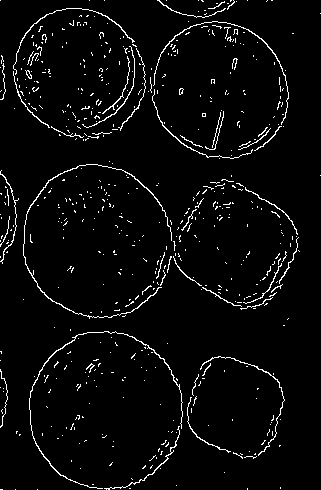

In [8]:
cannied_image = cv2.Canny(coins_noise, 27650, 28000, apertureSize=7, L2gradient=True)
display(
    "Best achieved edge detection by trial and error (see above cell with manual trackbars)"
)
Image.fromarray(cannied_image)

---

##### Zad. 3: Wyrównanie histogramu

Wyrównaj histogram obrazu `coins_noise`. Wyniki zaprezentuj za pomocą obrazów i towarzyszących im histogramów. Oceń uzyskaną zmianę w obrazie.

1.0


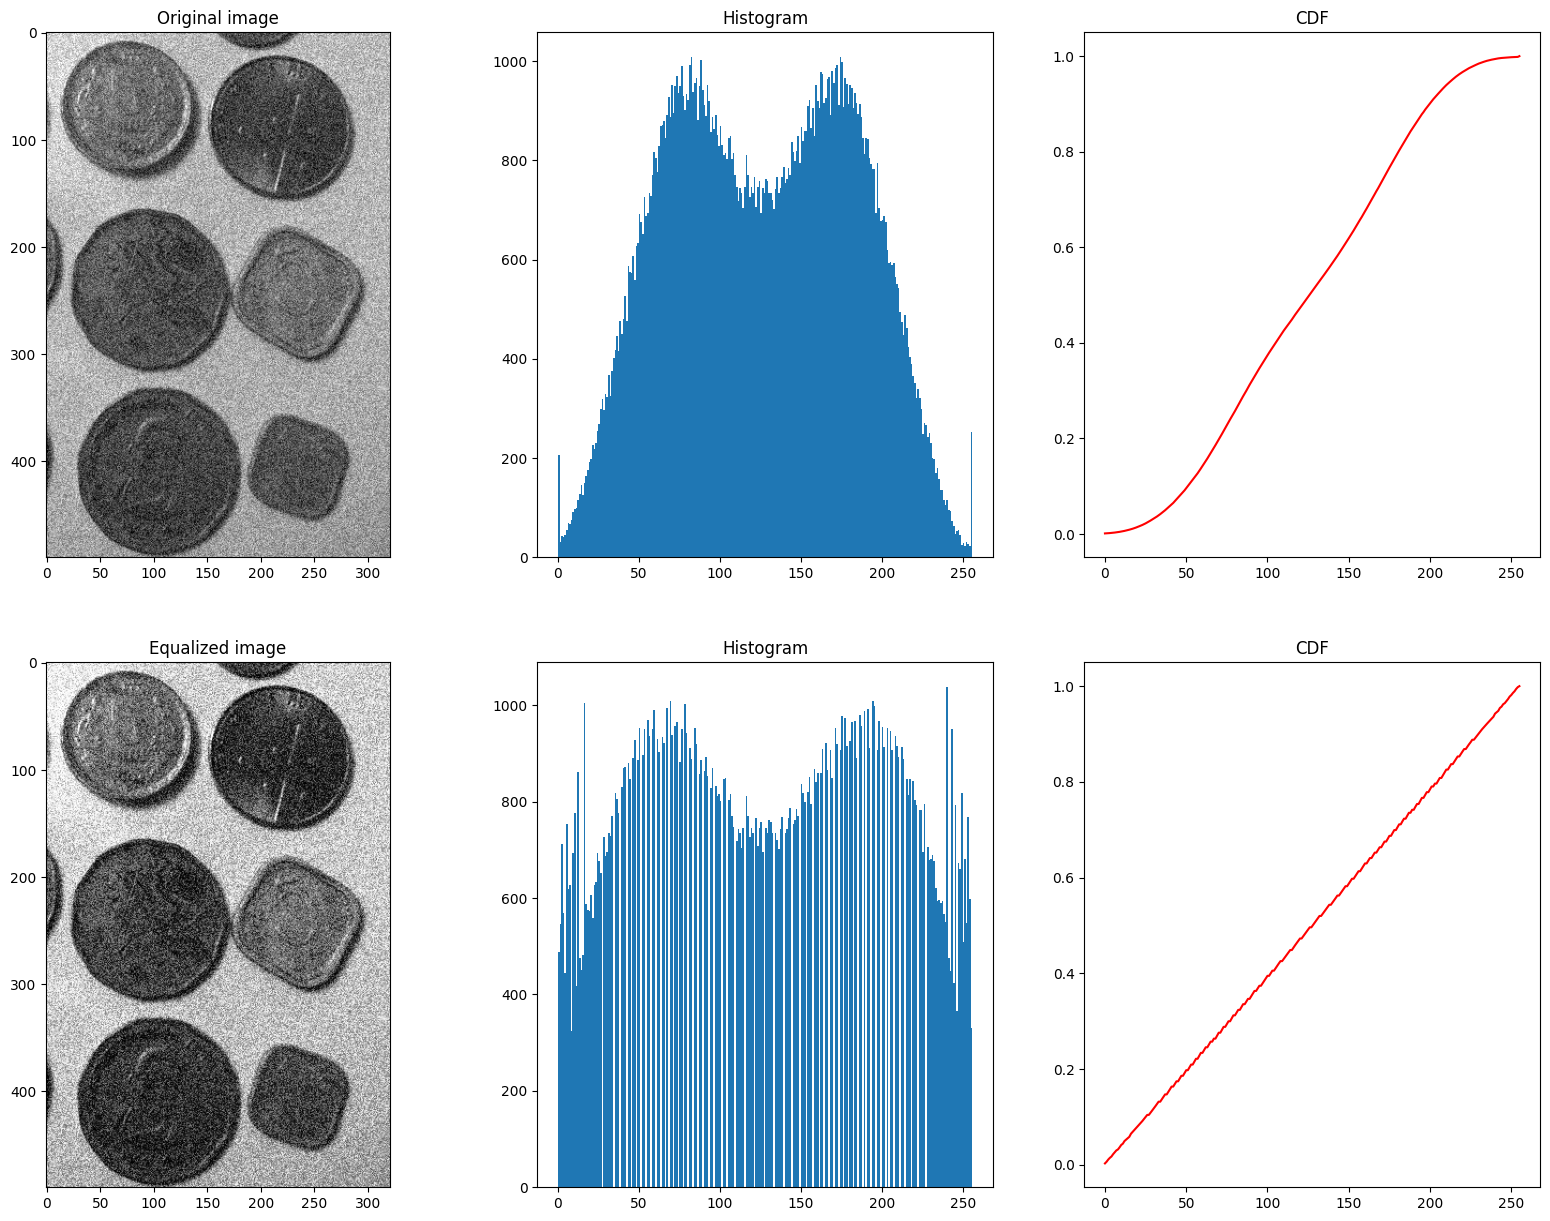

In [64]:
def plot_hist_from_numpy(hist, bins, ax, **kwargs):
    ax.bar(bins[:-1], hist, width=np.diff(bins), **kwargs)


fig, ax = plt.subplots(2, 3, figsize=(20, 15))
ax[0, 0].imshow(coins_noise, cmap="gray")
ax[0, 0].set_title("Original image")
hist, bins = np.histogram(coins_noise.ravel(), bins=256, range=[0, 256])
plot_hist_from_numpy(hist, bins, ax[0, 1], edgecolor=None, align="edge")
ax[0, 1].set_title("Histogram")
cdf = hist.cumsum() / hist.sum()
ax[0, 2].plot(cdf, color="red")
ax[0, 2].set_title("CDF")

eq_hist_coins = cv2.equalizeHist(coins_noise)
ax[1, 0].imshow(eq_hist_coins, cmap="gray")
ax[1, 0].set_title("Equalized image")
hist, bins = np.histogram(eq_hist_coins.ravel(), bins=256, range=[0, 256])
plot_hist_from_numpy(hist, bins, ax[1, 1], edgecolor=None, align="edge")
ax[1, 1].set_title("Histogram")
cdf = hist.cumsum() / hist.sum()
ax[1, 2].plot(cdf, color="red")
ax[1, 2].set_title("CDF")
pass

---

##### Zad. 4: Transformacja do rozkładu docelowego

Dla obrazu `hare_gray` wykonaj transformację do wybranego (założonego przez siebie) rozkładu docelowego, tak aby zmaksymalizować możliwość wyodrębnienia obiektu z otoczenia (zająca) przy użyciu algorytmu binaryzacji Otsu. Zacznij od zastanowienia się nad doborem rozkładu docelowego (możesz zbadać zachowanie transformacji w zależności od wybranego rozkładu).

Podpowiedź: przedstawiona we wstępie teoretycznym transformacja obu rozkładów (źródłowego i docelowego) do rozkładu jednostajnego _nie musi_ zostać faktycznie wykonana (dlatego nie używaj w zadaniu funkcji `cv2.equalizeHist`)! Wystarczy porównywanie ze sobą wartości ze skumulowanych rozkładów (rysunek 3).

Podpowiedź 2: [cv2.LUT](https://docs.opencv.org/4.5.3/d2/de8/group__core__array.html#gab55b8d062b7f5587720ede032d34156f)

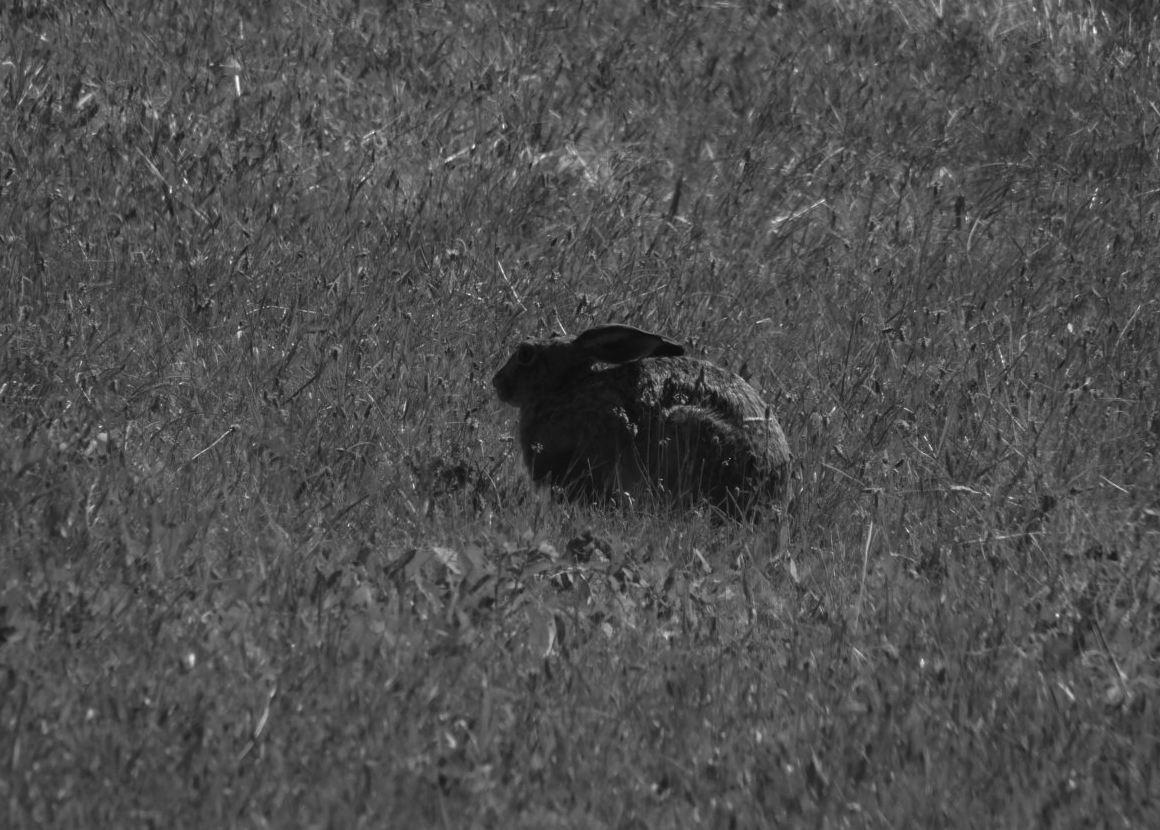

In [42]:
hare_gray = cv2.imread("Zajac.jpg", cv2.IMREAD_GRAYSCALE)
Image.fromarray(hare_gray)

Rozwiązanie:

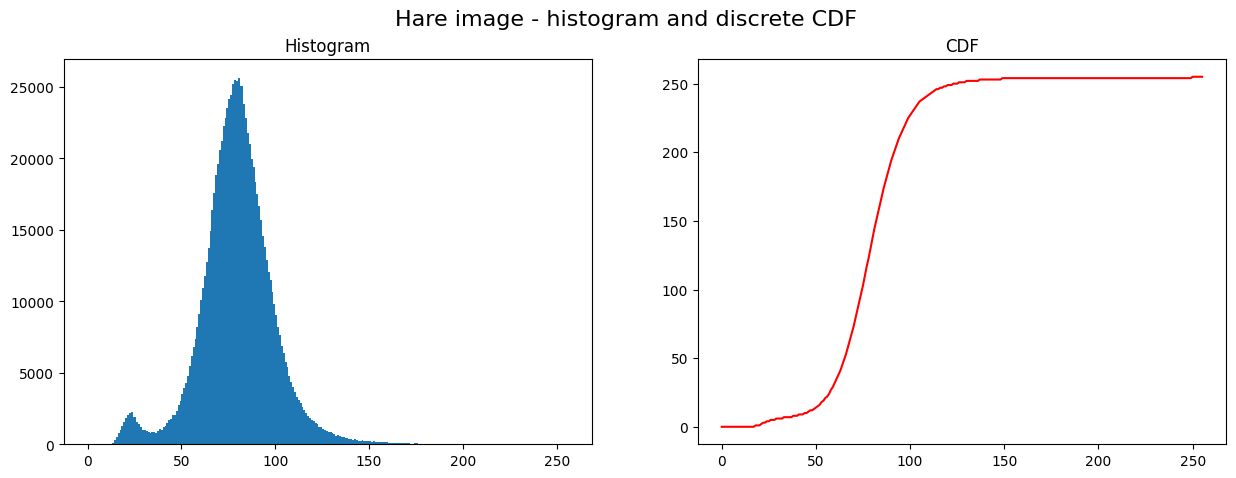

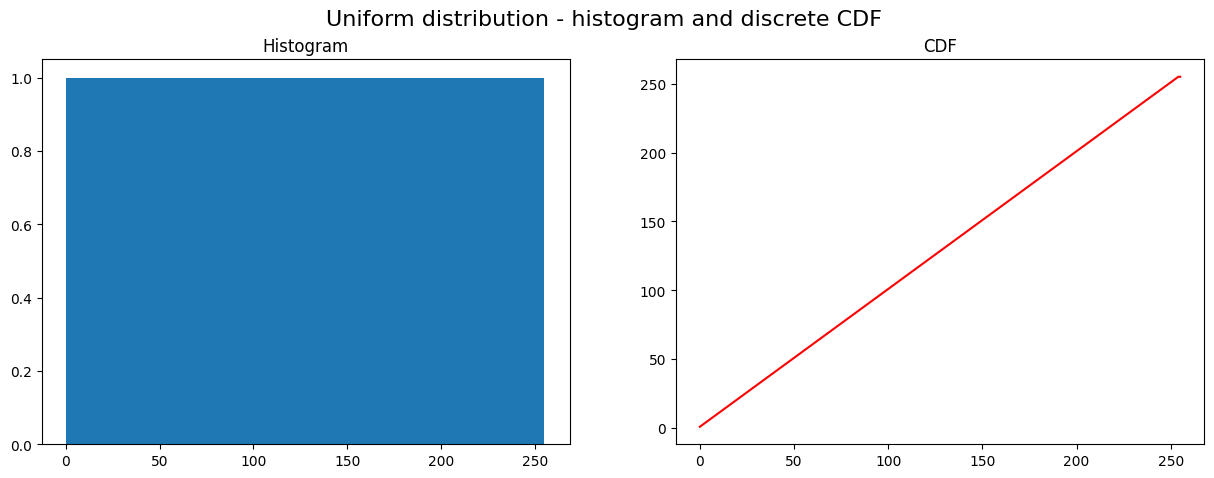

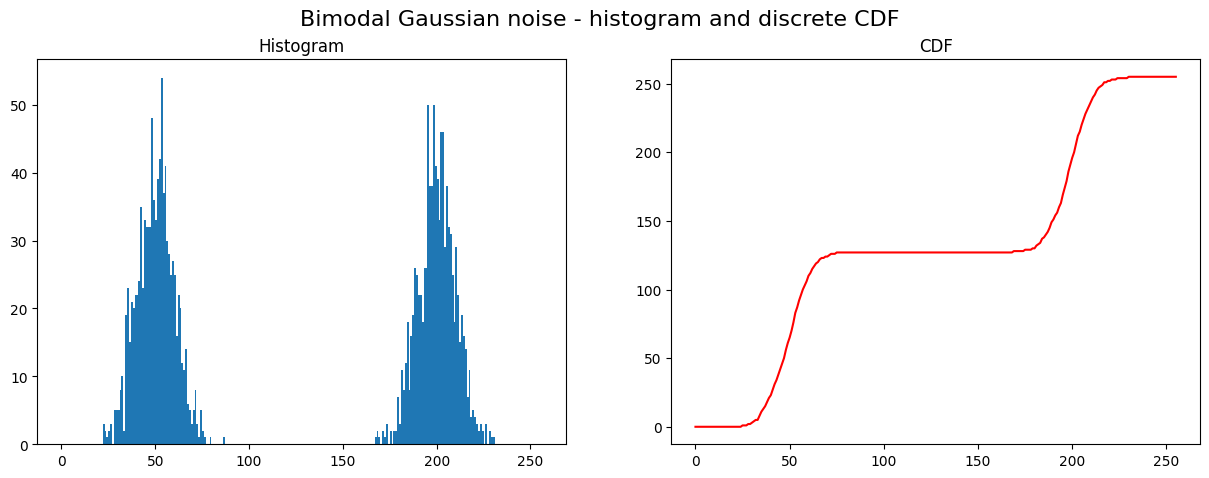

In [133]:
def get_256_hist_and_discrete_cdf(array):
    hist, bins = np.histogram(array.ravel(), bins=256, range=[0, 256])
    cdf = np.cumsum(hist) / hist.sum()
    cdf = (cdf * 255).astype(np.uint8)
    return hist, bins, cdf


def plot_cdf_for_numpy_array(array):
    hist, bins, cdf = get_256_hist_and_discrete_cdf(array)

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    plot_hist_from_numpy(hist, bins, ax[0], edgecolor=None, align="edge")
    ax[0].set_title("Histogram")
    ax[1].plot(cdf, color="red")
    ax[1].set_title("CDF")
    return fig, hist, bins, cdf


fig, _, _, _ = plot_cdf_for_numpy_array(hare_gray)
fig.suptitle("Hare image - histogram and discrete CDF", fontsize=16)

uniform_image = np.arange(255)
fig, _, _, _ = plot_cdf_for_numpy_array(uniform_image)
fig.suptitle("Uniform distribution - histogram and discrete CDF", fontsize=16)

mu1, sigma1 = 50, 10
mu2, sigma2 = 200, 10
rng = np.random.Generator(np.random.PCG64(seed=11))
gaussian_noise = np.concatenate(
    [
        rng.normal(mu1, sigma1, 1000),
        rng.normal(mu2, sigma2, 1000),
    ]
)
gaussian_noise = np.clip(gaussian_noise, 0, 255).astype(np.uint8)
fig, _, _, _ = plot_cdf_for_numpy_array(gaussian_noise)
fig.suptitle("Bimodal Gaussian noise - histogram and discrete CDF", fontsize=16)
pass